In [1]:
# Using VGG16
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as VGG16_preprocess_input

# Using Inception_Resnet_V2
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input as InceptionResNetV2_preprocess_input

# import package
from keras.preprocessing import image
from keras.models import Model
from keras import datasets
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [2]:
# Download pretrained model
base_model_vgg16 = VGG16(weights='imagenet', include_top=False)

#base_model_inception_resnet_v2 = InceptionResNetV2(weights='imagenet', include_top=False)

In [5]:
base_model_vgg16.get_weights()[0].shape

(3, 3, 3, 64)

In [17]:
config_vgg16 = base_model_vgg16.get_config() # Description about base_model

# Read layers name
#names_vgg16 = {}
#names_vgg16={i : each_layer['name'] for i, each_layer in enumerate(config_vgg16['layers'])} 
names_vgg16 = [[i,each_layer['name']] for i, each_layer in enumerate(config_vgg16['layers'])] 
#names_vgg16 = np.reshape(np.array(names_vgg16), [-1,2])
print(names_vgg16)

[[0, 'input_1'], [1, 'block1_conv1'], [2, 'block1_conv2'], [3, 'block1_pool'], [4, 'block2_conv1'], [5, 'block2_conv2'], [6, 'block2_pool'], [7, 'block3_conv1'], [8, 'block3_conv2'], [9, 'block3_conv3'], [10, 'block3_pool'], [11, 'block4_conv1'], [12, 'block4_conv2'], [13, 'block4_conv3'], [14, 'block4_pool'], [15, 'block5_conv1'], [16, 'block5_conv2'], [17, 'block5_conv3'], [18, 'block5_pool']]


[[0, 'input_1'], [1, 'block1_conv1'], [2, 'block1_conv2'], [3, 'block1_pool'], [4, 'block2_conv1'], [5, 'block2_conv2'], [6, 'block2_pool'], [7, 'block3_conv1'], [8, 'block3_conv2'], [9, 'block3_conv3'], [10, 'block3_pool'], [11, 'block4_conv1'], [12, 'block4_conv2'], [13, 'block4_conv3'], [14, 'block4_pool'], [15, 'block5_conv1'], [16, 'block5_conv2'], [17, 'block5_conv3'], [18, 'block5_pool']]
6


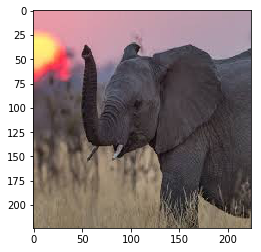

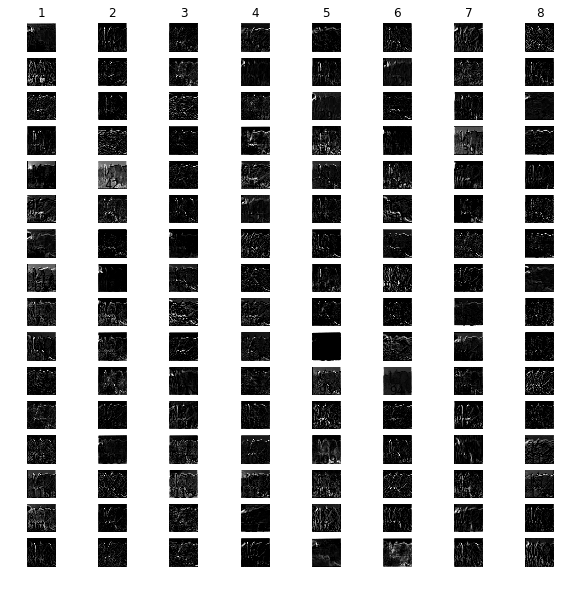

In [22]:
config_vgg16 = base_model_vgg16.get_config() # Description about base_model

# Read layers name
names_vgg16 = [[i,each_layer['name']] for i, each_layer in enumerate(config_vgg16['layers'])] 
#names_vgg16 = np.reshape(np.array(names_vgg16), [-1,2])
print(names_vgg16)

# Modeling 
idx = int(input())
model_vgg16 = Model(inputs=base_model_vgg16.input, outputs=base_model_vgg16.get_layer(names_vgg16[idx][1]).output)

# Read Image
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = VGG16_preprocess_input(x)

plt.imshow(np.uint8(x[0]))
plt.show()
#(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()
#x = np.reshape(train_x[0].copy(), [1, 28, 28, 1])
#x = np.concatenate((x, x, x), axis = 3)
block1_conv1_feature = model_vgg16.predict(x)

plt.figure(figsize=(10, 10))
for i in range(block1_conv1_feature.shape[-1]):
    plt.subplot(block1_conv1_feature.shape[-1]//8, 8, i+1)
    plt.imshow(block1_conv1_feature[0,:,:,i], cmap='gray')
    plt.title('%d'%(i+1))
    plt.axis('off')
    
plt.show()

In [ ]:
config_inception_resnet_v2 = base_model_inception_resnet_v2.get_config()
names_inception_resnet_v2 = [[i,each_layer['name']] for i, each_layer in enumerate(config_inception_resnet_v2['layers'])]
names_inception_resnet_v2 = np.reshape(np.array(names_inception_resnet_v2), [-1,2])
print(names_inception_resnet_v2)
idx = int(input())
model_inception_resnet_v2 = Model(inputs=base_model_inception_resnet_v2.input,
                                  outputs=base_model_inception_resnet_v2.get_layer(names_inception_resnet_v2[idx][1]).output)

img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)

plt.imshow(np.uint8(x[0]))
plt.show()
#(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()
#x = np.reshape(train_x[0].copy(), [1, 28, 28, 1])
#x = np.concatenate((x, x, x), axis = 3)
block1_conv1_feature = model_inception_resnet_v2.predict(x)
plt.figure(figsize=(10, 10))
for i in range(block1_conv1_feature.shape[-1]):
    plt.subplot(8, block1_conv1_feature.shape[-1]//8, i+1)
    plt.imshow(block1_conv1_feature[0,:,:,i], cmap='gray')
    plt.title('%d'%(i+1))
    plt.axis('off')
    #plt.tight_layout()
    
plt.show()